In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

2022-09-13 15:54:46.907537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-13 15:54:47.104519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fidel/gurobi952/linux64/lib
2022-09-13 15:54:47.104538: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-13 15:54:47.141538: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-13 15:54

In [2]:
def intercala_listas(lista1,lista2):
    # Assumes lista1 and lista2 are the same length 
    lista = []

    for i in range(len(lista1)):
        lista.append(lista1[i])
        lista.append(lista2[i])

    return lista

In [3]:
# step 1

CANT_ENTRENAMIENTO=50
CANT_PRUEBAS=50
filenames_train = intercala_listas(
    [f'dataset/COVID/images/COVID-{i}.png' for i in range(1, CANT_ENTRENAMIENTO+1)],
    [f'dataset/Normal/images/Normal-{i}.png' for i in range(1, CANT_ENTRENAMIENTO+1)])
labels_train = tf.constant(intercala_listas(
    [1 for i in range(1,CANT_ENTRENAMIENTO+1)],
    [0 for i in range(1,CANT_ENTRENAMIENTO+1)]))

filenames_test = intercala_listas(
    [f'dataset/COVID/images/COVID-{i}.png' for i in range(CANT_ENTRENAMIENTO+1, CANT_ENTRENAMIENTO+CANT_PRUEBAS+1)],
    [f'dataset/Normal/images/Normal-{i}.png' for i in range(CANT_ENTRENAMIENTO+1, CANT_ENTRENAMIENTO+CANT_PRUEBAS+1)])
labels_test = tf.constant(intercala_listas(
    [1 for i in range(1,CANT_PRUEBAS+1)],
    [0 for i in range(1,CANT_PRUEBAS+1)]))

print(filenames_train)
print(labels_train)
# print(filenames_test)
# print(labels_test)

['dataset/COVID/images/COVID-1.png', 'dataset/Normal/images/Normal-1.png', 'dataset/COVID/images/COVID-2.png', 'dataset/Normal/images/Normal-2.png', 'dataset/COVID/images/COVID-3.png', 'dataset/Normal/images/Normal-3.png', 'dataset/COVID/images/COVID-4.png', 'dataset/Normal/images/Normal-4.png', 'dataset/COVID/images/COVID-5.png', 'dataset/Normal/images/Normal-5.png', 'dataset/COVID/images/COVID-6.png', 'dataset/Normal/images/Normal-6.png', 'dataset/COVID/images/COVID-7.png', 'dataset/Normal/images/Normal-7.png', 'dataset/COVID/images/COVID-8.png', 'dataset/Normal/images/Normal-8.png', 'dataset/COVID/images/COVID-9.png', 'dataset/Normal/images/Normal-9.png', 'dataset/COVID/images/COVID-10.png', 'dataset/Normal/images/Normal-10.png', 'dataset/COVID/images/COVID-11.png', 'dataset/Normal/images/Normal-11.png', 'dataset/COVID/images/COVID-12.png', 'dataset/Normal/images/Normal-12.png', 'dataset/COVID/images/COVID-13.png', 'dataset/Normal/images/Normal-13.png', 'dataset/COVID/images/COVID-1

2022-09-13 15:54:55.655002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fidel/gurobi952/linux64/lib
2022-09-13 15:54:55.655031: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-13 15:54:55.655049: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os2): /proc/driver/nvidia/version does not exist
2022-09-13 15:54:55.655328: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# step 2: create a dataset returning slices of `filenames`
datos_train = tf.data.Dataset.from_tensor_slices((filenames_train, labels_train))
datos_test = tf.data.Dataset.from_tensor_slices((filenames_test, labels_test))

In [5]:
#Obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos_train, datos_test
datos_entrenamiento

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [6]:
nombres_clases = ['normal','covid']
nombres_clases


['normal', 'covid']

In [7]:
#Funcion de normalizacion para los datos (Pasar de 0-255 a 0-1)
#Hace que la red aprenda mejor y mas rapido

def _parse_function(filename, label):
  image_string = tf.io.read_file(filename)
  image_decoded = tf.image.decode_image(image_string, channels=0)
  image = tf.cast(image_decoded, tf.float32)
  image /= 255 
  return image, label

#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(_parse_function)
datos_pruebas = datos_pruebas.map(_parse_function)

#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

2022-09-13 15:55:11.956030: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


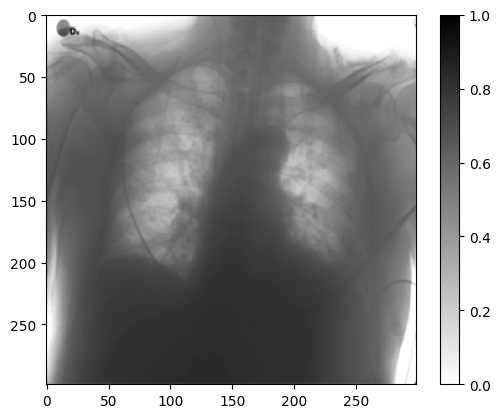

In [8]:
#Mostrar una imagen de los datos de pruebas, de momento mostremos la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((299,299)) #Redimensionar, cosas de tensores, lo veremos despues# imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensores, lo veremos despues

import matplotlib.pyplot as plt

#Dibujar dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


2022-09-13 15:55:15.603788: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


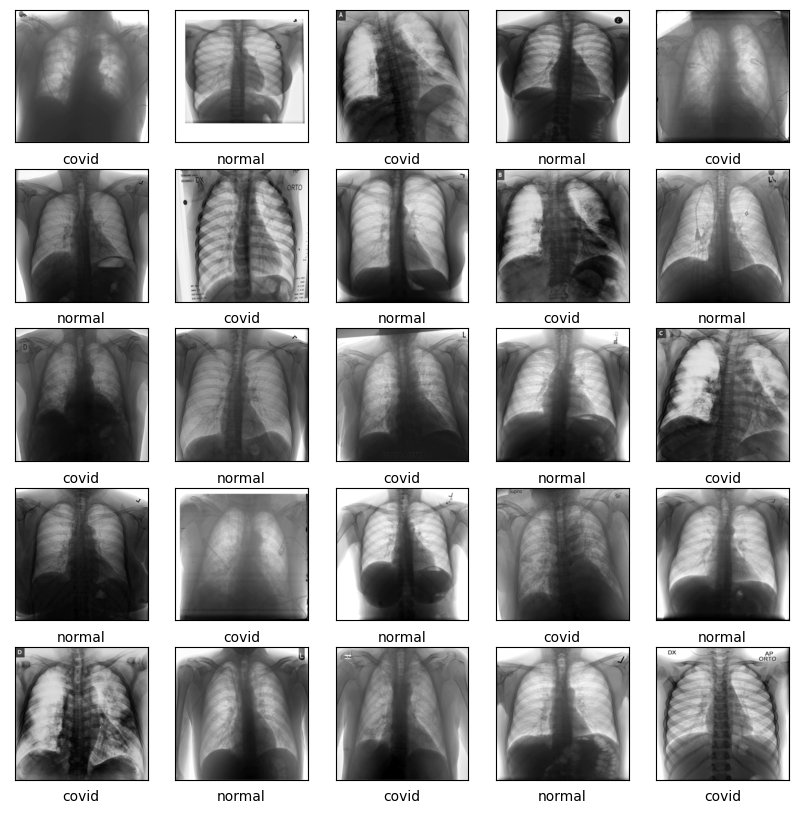

In [9]:
#Dibujar mas
plt.figure(figsize=(10,10))
# for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((299,299))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()


In [10]:
#Crear el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(299, 299, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(), #1 - blanco y negro
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
  #tf.keras.layers.Dense(10, activation=tf.nn.sigmoid) #Para redes de clasificacion
])

In [ ]:
# modelo = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(299, 299, 1)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(512, activation="sigmoid")
# ])

In [11]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [12]:
# #Los numeros de datos en entrenamiento y pruebas (60k y 10k)
num_ej_entrenamiento = CANT_ENTRENAMIENTO
num_ej_pruebas = CANT_PRUEBAS

In [13]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

50
50


In [14]:
#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [15]:
import math

#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=10,batch_size=TAMANO_LOTE,validation_data=datos_pruebas, steps_per_epoch= 5,validation_steps=3)

Epoch 1/10


2022-09-13 15:55:39.565875: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 361304064 exceeds 10% of free system memory.
2022-09-13 15:55:41.273041: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
2022-09-13 15:55:41.273113: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 361304064 exceeds 10% of free system memory.


1/5 [=====>........................] - ETA: 15s - loss: 0.6932 - accuracy: 0.5312

2022-09-13 15:55:42.239423: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 361304064 exceeds 10% of free system memory.
2022-09-13 15:55:43.820057: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.


5/5 [==============================] - 16s 3s/step - loss: 0.7035 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10


2022-09-13 15:55:54.462670: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 14s 3s/step - loss: 0.6903 - accuracy: 0.5813 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/10


2022-09-13 15:56:08.637914: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 14s 3s/step - loss: 0.6902 - accuracy: 0.5125 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 4/10


2022-09-13 15:56:22.882811: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 15s 3s/step - loss: 0.6943 - accuracy: 0.5437 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 5/10


2022-09-13 15:56:37.397103: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 14s 3s/step - loss: 0.6921 - accuracy: 0.5375 - val_loss: 0.6936 - val_accuracy: 0.4792
Epoch 6/10


2022-09-13 15:56:51.034355: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 14s 3s/step - loss: 0.6870 - accuracy: 0.6000 - val_loss: 0.6936 - val_accuracy: 0.4792
Epoch 7/10


2022-09-13 15:57:04.902248: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 14s 3s/step - loss: 0.6809 - accuracy: 0.6062 - val_loss: 0.6971 - val_accuracy: 0.5104
Epoch 8/10


2022-09-13 15:57:19.210261: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 15s 3s/step - loss: 0.6996 - accuracy: 0.5188 - val_loss: 0.6962 - val_accuracy: 0.4583
Epoch 9/10


2022-09-13 15:57:33.991526: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 14s 3s/step - loss: 0.6651 - accuracy: 0.6313 - val_loss: 0.7056 - val_accuracy: 0.5000
Epoch 10/10


2022-09-13 15:57:47.824290: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


5/5 [==============================] - 14s 3s/step - loss: 0.6101 - accuracy: 0.6750 - val_loss: 0.7802 - val_accuracy: 0.5104


2022-09-13 15:58:02.098234: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


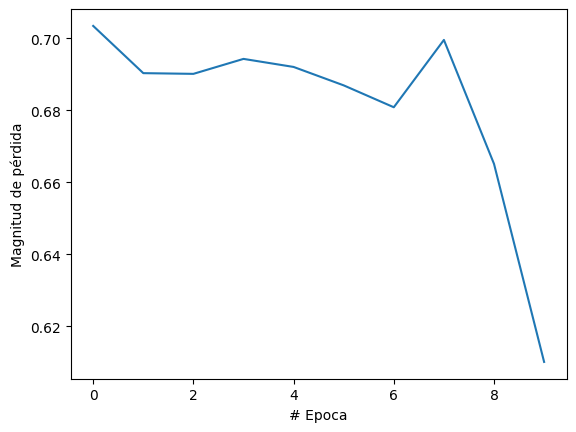

In [16]:
#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

1/1 [==============================] - 1s 769ms/step


2022-09-13 15:59:21.968930: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


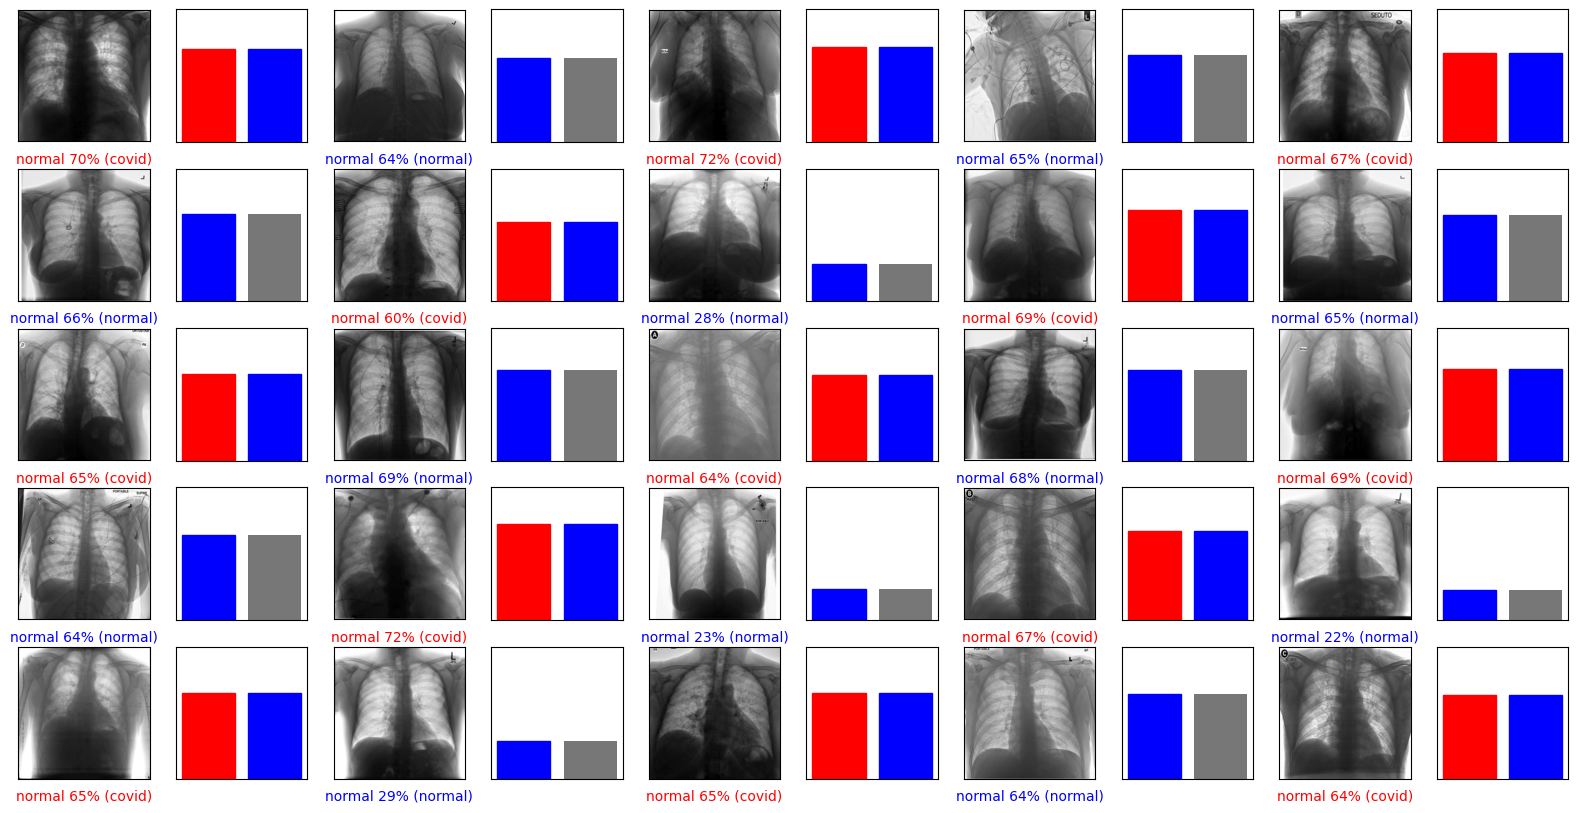

In [17]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(2), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [18]:
#Probar una imagen suelta
imagen = imagenes_prueba[4] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 148ms/step
Prediccion: normal


In [ ]:
#Exportacion del modelo a h5
#modelo.save('modelo_exportado.h5')

In [ ]:
#Instalar tensorflowjs para convertir el h5 a un modelo que pueda cargar tensorflowjs en un explorador
# %pip install tensorflowjs

In [ ]:
#Convertir el archivo h5 a formato de tensorflowjs
#!mkdir tfjs_target_dir
#!tensorflowjs_converter --input_format keras modelo_exportado.h5 tfjs_target_dir

In [ ]:
#Veamos si si creo la carpeta
#!ls

In [ ]:
#Veamos el contenido de la carpeta
#!ls tfjs_target_dir